In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error 
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth',1000)
import datetime
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
from matplotlib_venn import venn2, venn2_circles
from bayes_opt import BayesianOptimization

In [200]:
train = pd.read_csv('D:/DS/Predict the estimated time of arrival (ETA) for motorbike deliveries/train.csv')
test = pd.read_csv('D:/DS/Predict the estimated time of arrival (ETA) for motorbike deliveries/test.csv')
data_des = pd.read_csv('D:/DS/Predict the estimated time of arrival (ETA) for motorbike deliveries/VariableDefinitions.csv')
riders_data=pd.read_csv('D:/DS/Predict the estimated time of arrival (ETA) for motorbike deliveries/Riders.csv')

### Data description:

In [201]:
data_des

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a platform
1,Vehicle Type,"For this competition limited to bikes, however in practice Sendy service extends to trucks and vans"
2,Platform Type,"Platform used to place the order, there are 4 types"
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was placed
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order was confirmed by a rider


In [202]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [203]:
print('Number of rows and columns in train set:',train.shape)
print('Number of rows and columns in test set', test.shape)

Number of rows and columns in train set: (21201, 29)
Number of rows and columns in test set (7068, 25)


### Number of unique value in each column:

In [204]:
for col, values in train.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))

Order No: 21201
User Id: 3186
Vehicle Type: 1
Platform Type: 4
Personal or Business: 2
Placement - Day of Month: 31
Placement - Weekday (Mo = 1): 7
Placement - Time: 15686
Confirmation - Day of Month: 31
Confirmation - Weekday (Mo = 1): 7
Confirmation - Time: 15742
Arrival at Pickup - Day of Month: 31
Arrival at Pickup - Weekday (Mo = 1): 7
Arrival at Pickup - Time: 15767
Pickup - Day of Month: 31
Pickup - Weekday (Mo = 1): 7
Pickup - Time: 15690
Arrival at Destination - Day of Month: 31
Arrival at Destination - Weekday (Mo = 1): 7
Arrival at Destination - Time: 15725
Distance (KM): 45
Temperature: 188
Precipitation in millimeters: 54
Pickup Lat: 3666
Pickup Long: 3656
Destination Lat: 5302
Destination Long: 5267
Rider Id: 924
Time from Pickup to Arrival: 4067


In [205]:
#unique value count for vehicle type is 1 so we don't need this column.
train.drop('Vehicle Type', inplace = True, axis = 1)
test.drop('Vehicle Type', inplace = True, axis = 1)

### Overlapping User ids and Rider ids

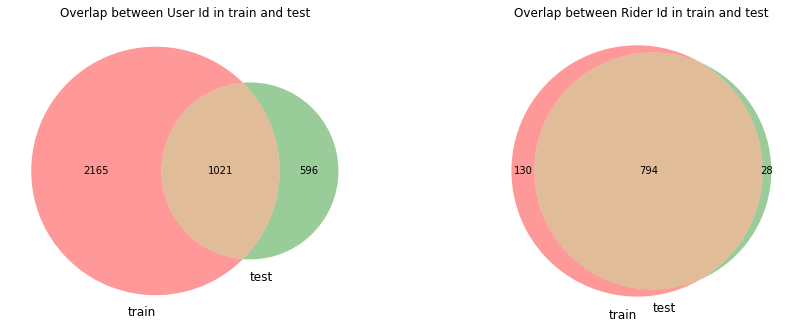

In [206]:
def get_venn(axes, feature1,feature2):
    
    axes[0,0].set_title(f'Overlap between {feature1} in train and test')
    venn2([set(train[feature1].values), set(test[feature1].values)], set_labels = ('train','test'), ax=axes[0,0])
    
    axes[0,1].set_title(f'Overlap between {feature2} in train and test')
    venn2([set(train[feature2].values), set(test[feature2].values)], set_labels = ('train','test'), ax=axes[0,1])

figure, axes = plt.subplots(2,2, figsize=(15,12))
figure.delaxes(axes[1][0])
figure.delaxes(axes[1][1])
get_venn(axes, 'User Id','Rider Id')

#### We don't have any training info for 28 riders from test set.
#### As we have overlapping user id and rider id mergung train and test dataset will make things easier, for example creating categorical code or generating dummies.

In [207]:
train['source']='train'
test['source']='test'

In [208]:
data = pd.concat([train,test], sort=False)
print('Number of rows and columns in data:', data.shape)

Number of rows and columns in data: (28269, 29)


### Riders who are not in training data set

In [209]:
riders = data.groupby(['Rider Id', 'source']).count().reset_index()
riders = riders.iloc[:,0:2]
riders_in_test_only = pd.pivot_table(riders, values = 'source', index= 'Rider Id', columns='source', aggfunc=len).reset_index()
riders_in_test_only = riders_in_test_only[riders_in_test_only.train.isna()]
riders_in_test_only

source,Rider Id,test,train
41,Rider_Id_135,1.0,NaN
61,Rider_Id_153,1.0,NaN
69,Rider_Id_160,1.0,NaN
146,Rider_Id_23,1.0,NaN
262,Rider_Id_335,1.0,NaN
304,Rider_Id_374,1.0,NaN
320,Rider_Id_389,1.0,NaN
374,Rider_Id_437,1.0,NaN
381,Rider_Id_443,1.0,NaN
460,Rider_Id_514,1.0,NaN


In [210]:
riders_in_test_only = riders_in_test_only['Rider Id']
data[data['Rider Id'].isin(riders_in_test_only)].reset_index().head()

,index,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source
0,103,Order_No_11297,User_Id_136,3,Business,13,4,8:58:48 AM,13,4,9:02:54 AM,13,4,10:14:11 AM,13,4,10:44:04 AM,NaN,NaN,NaN,16,21.8,NaN,-1.325452,36.721658,-1.266917,36.807748,Rider_Id_721,NaN,test
1,375,Order_No_14572,User_Id_3214,3,Business,1,5,3:06:07 PM,1,5,3:15:30 PM,1,5,3:36:04 PM,1,5,3:43:12 PM,NaN,NaN,NaN,7,32.0,NaN,-1.289795,36.795713,-1.294614,36.834063,Rider_Id_688,NaN,test
2,405,Order_No_5495,User_Id_1976,3,Business,30,5,2:42:13 PM,30,5,2:45:20 PM,30,5,3:16:44 PM,30,5,3:24:05 PM,NaN,NaN,NaN,4,24.5,NaN,-1.257028,36.781044,-1.261589,36.792873,Rider_Id_667,NaN,test
3,606,Order_No_24697,User_Id_2755,2,Personal,4,5,7:13:22 PM,4,5,7:33:07 PM,4,5,7:37:46 PM,4,5,7:41:44 PM,NaN,NaN,NaN,9,19.3,NaN,-1.285445,36.818836,-1.269680,36.864009,Rider_Id_153,NaN,test
4,889,Order_No_1237,User_Id_1033,3,Personal,20,3,9:19:29 AM,20,3,9:20:05 AM,20,3,9:50:03 AM,20,3,9:55:27 AM,NaN,NaN,NaN,13,NaN,NaN,-1.232604,36.800903,-1.302839,36.795111,Rider_Id_776,NaN,test


In [211]:
data['Rider Id'].value_counts().head()

Rider_Id_726    328
Rider_Id_576    294
Rider_Id_523    263
Rider_Id_101    262
Rider_Id_205    227
Name: Rider Id, dtype: int64

Platform Type Count:
 3    24069
1     2858
2     1316
4       26
Name: Platform Type, dtype: int64


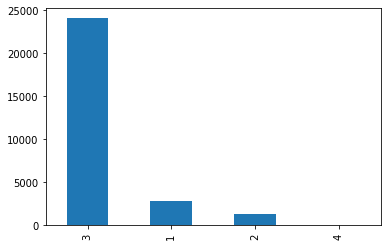

In [212]:
print('Platform Type Count:\n', data['Platform Type'].value_counts())
data['Platform Type'].value_counts().plot('bar');

Personal or Business:
 Business    23164
Personal     5105
Name: Personal or Business, dtype: int64


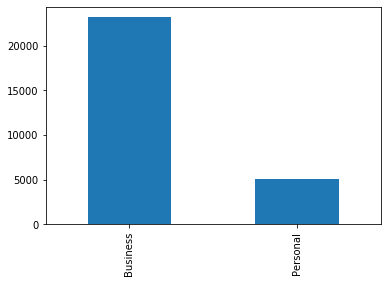

In [213]:
print('Personal or Business:\n', data['Personal or Business'].value_counts())
data['Personal or Business'].value_counts().plot('bar');

In [214]:
train.head(3)

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,train
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,train
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,train


In [215]:
test.head(3)

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,source
0,Order_No_19248,User_Id_3355,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,test
1,Order_No_12736,User_Id_3647,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,test
2,Order_No_768,User_Id_2154,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,test


#### We have information about time from pickup to arrival, let's create different columns for time from placement to confirmation, confirmation to arrival at pickup and pickup time gap.  

In [216]:
data['Placement - Time'] = pd.to_datetime(data['Placement - Time'])
data['Confirmation - Time'] = pd.to_datetime(data['Confirmation - Time'])
data['Arrival at Pickup - Time'] = pd.to_datetime(data['Arrival at Pickup - Time'])
data['Pickup - Time'] = pd.to_datetime(data['Pickup - Time'])
#data['Arrival at Destination - Time'] = pd.to_datetime(data['Arrival at Destination - Time'])

In [217]:
data['placement_confirmation_time_gap'] = data['Confirmation - Time'] - data['Placement - Time']
data['placement_confirmation_time_gap'] = pd.to_datetime(data['placement_confirmation_time_gap'])
data['placement_confirmation_time_gap'] = data['placement_confirmation_time_gap'].astype(str)
x = data.placement_confirmation_time_gap.str.split(' ', expand= True).add_prefix('t')
data['placement_confirmation_time_gap'] = x.t1

In [218]:
data['confirmation_arrival@pickup_time_gap'] = data['Arrival at Pickup - Time'] - data['Confirmation - Time']
data['confirmation_arrival@pickup_time_gap'] = pd.to_datetime(data['confirmation_arrival@pickup_time_gap'])
data['confirmation_arrival@pickup_time_gap'] = data['confirmation_arrival@pickup_time_gap'].astype(str)
y = data['confirmation_arrival@pickup_time_gap'].str.split(' ', expand= True).add_prefix('t')
data['confirmation_arrival@pickup_time_gap'] = y.t1

In [219]:
data['arrival@pickup_pickup_time_gap'] = data['Pickup - Time'] - data['Arrival at Pickup - Time']
data['arrival@pickup_pickup_time_gap'] = pd.to_datetime(data['arrival@pickup_pickup_time_gap'])
data['arrival@pickup_pickup_time_gap'] = data['arrival@pickup_pickup_time_gap'].astype(str)
z = data['arrival@pickup_pickup_time_gap'].str.split(' ', expand= True).add_prefix('t')
data['arrival@pickup_pickup_time_gap'] = z.t1

In [220]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [221]:
data['placement_confirmation_time_gap'] = data['placement_confirmation_time_gap'].apply(get_sec)
data['confirmation_arrival@pickup_time_gap'] = data['confirmation_arrival@pickup_time_gap'].apply(get_sec)
data['arrival@pickup_pickup_time_gap'] = data['arrival@pickup_pickup_time_gap'].apply(get_sec)

In [222]:
def get_hour(datetime):
    d=data[datetime].astype(str)
    d=d.str.split(' ', expand=True).add_prefix('t')
    d=d.t1.str.split(':', expand=True).add_prefix('tt')
    d=d['tt0']
    d=d.astype(int)
    return d

In [223]:
data['Placement - Time'] = get_hour('Placement - Time')
data['Confirmation - Time'] = get_hour('Confirmation - Time')
data['Arrival at Pickup - Time'] = get_hour('Arrival at Pickup - Time')
data['Pickup - Time'] = get_hour('Pickup - Time')

In [224]:
data.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap
0,Order_No_4211,User_Id_633,3,Business,9,5,9,9,5,9,9,5,10,9,5,10,9.0,5.0,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11,12,5,11,12,5,11,12,5,11,12.0,5.0,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227
2,Order_No_1899,User_Id_265,3,Business,30,2,12,30,2,12,30,2,12,30,2,12,30.0,2.0,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209
3,Order_No_9336,User_Id_1402,3,Business,15,5,9,15,5,9,15,5,9,15,5,9,15.0,5.0,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9,13,1,9,13,1,10,13,1,10,13.0,1.0,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90


In [225]:
data.shape

(28269, 32)

In [226]:
data.isna().sum()

Order No                                         0
User Id                                          0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month         7068
Arrival at Destination - Weekday (Mo = 1)     7068
Arrival at Destination - Time                 7068
Distance (KM)                  

In [227]:
#Only 2.65% data has precipitation information so let's drop the feature.
data.drop('Precipitation in millimeters', axis =1, inplace =True)

#### As 80% data has temperature information we will retain this anf fill missing values with avg. Temperature based on lat and long info.

In [228]:
avg_temp = data.groupby(['Pickup Lat','Pickup Long'])['Temperature'].mean().reset_index()
data = pd.merge(data,avg_temp,on=['Pickup Lat','Pickup Long'],how='left')
data['Temperature'] = data.apply(lambda row: row['Temperature_y'] if np.isnan (row['Temperature_x']) else row['Temperature_x'],
                                axis=1)
data.drop(['Temperature_x','Temperature_y'], axis=1, inplace=True)

#### Still we have few missing info for temp we will fill this with overall avg.

In [229]:
data.Temperature.fillna(data.Temperature.mean(), inplace=True)

#### Arrival at destination information in dataset is not required as this is what we are going to predict so we don't need add these info as we have total seconds info in target values.

In [230]:
data.drop(['Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination - Time'],
           axis=1, inplace=True)

#### Also information about confirmation, pickup, arrival Day of motnh and weekday are redundant so we will keep only one column for these info and drop rest of the columns which are containing same information.

In [231]:
data.drop(['Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month',
          'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month','Pickup - Weekday (Mo = 1)'], axis=1, inplace=True)

In [232]:
data.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature
0,Order_No_4211,User_Id_633,3,Business,9,5,9,9,10,10,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363,20.400000
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11,11,11,11,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227,26.400000
2,Order_No_1899,User_Id_265,3,Business,30,2,12,12,12,12,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209,23.340194
3,Order_No_9336,User_Id_1402,3,Business,15,5,9,9,9,9,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310,19.200000
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9,9,10,10,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90,15.400000


In [233]:
data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Distance (KM)', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'source',
       'placement_confirmation_time_gap',
       'confirmation_arrival@pickup_time_gap',
       'arrival@pickup_pickup_time_gap', 'Temperature'],
      dtype='object')

In [234]:
riders_data.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [235]:
data=data.merge(riders_data, how='left', on='Rider Id')
data.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9,9,10,10,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363,20.400000,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11,11,11,11,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227,26.400000,396,339,13.6,69
2,Order_No_1899,User_Id_265,3,Business,30,2,12,12,12,12,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209,23.340194,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,3,Business,15,5,9,9,9,9,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310,19.200000,886,283,14.5,113
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9,9,10,10,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90,15.400000,2311,872,14.1,533


In [236]:
data.shape

(28269, 26)

In [237]:
avg_data=data.groupby(['Rider Id'])['Time from Pickup to Arrival'].agg([len,min,max,'mean','std','skew']).reset_index()
avg_data.head(10)

,Rider Id,len,min,max,mean,std,skew
0,Rider_Id_0,1.0,1393.0,1393.0,1393.000000,NaN,NaN
1,Rider_Id_1,1.0,1333.0,1333.0,1333.000000,NaN,NaN
2,Rider_Id_10,62.0,2.0,1934.0,529.098039,757.940321,0.920218
3,Rider_Id_100,129.0,224.0,4188.0,1271.929293,822.844472,1.227327
4,Rider_Id_101,262.0,15.0,5525.0,1755.579235,1030.088209,1.226445
5,Rider_Id_102,26.0,5.0,5530.0,1717.352941,1353.735708,1.290299
6,Rider_Id_103,198.0,235.0,3718.0,1261.390728,709.651388,0.914025
7,Rider_Id_104,2.0,1159.0,2863.0,2011.000000,1204.909955,NaN
8,Rider_Id_105,72.0,79.0,3913.0,1753.781818,847.212285,0.455385
9,Rider_Id_106,36.0,14.0,5184.0,2141.275862,1418.834227,0.429407


In [238]:
avg_data=data.groupby(['Rider Id'])['Time from Pickup to Arrival'].agg([len,min,max,'mean']).reset_index()
data=data.merge(avg_data, how='left', on='Rider Id')
data.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,len,min,max,mean
0,Order_No_4211,User_Id_633,3,Business,9,5,9,9,10,10,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363,20.400000,1637,1309,13.8,549,30.0,527.0,2986.0,1709.478261
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11,11,11,11,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227,26.400000,396,339,13.6,69,51.0,2.0,3373.0,1698.222222
2,Order_No_1899,User_Id_265,3,Business,30,2,12,12,12,12,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209,23.340194,1023,242,12.5,114,133.0,341.0,4843.0,2042.200000
3,Order_No_9336,User_Id_1402,3,Business,15,5,9,9,9,9,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310,19.200000,886,283,14.5,113,126.0,2.0,4681.0,1150.823529
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9,9,10,10,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90,15.400000,2311,872,14.1,533,104.0,257.0,4891.0,1523.231707


In [239]:
data.isna().sum()

Order No                                   0
User Id                                    0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Time                        0
Arrival at Pickup - Time                   0
Pickup - Time                              0
Distance (KM)                              0
Pickup Lat                                 0
Pickup Long                                0
Destination Lat                            0
Destination Long                           0
Rider Id                                   0
Time from Pickup to Arrival             7068
source                                     0
placement_confirmation_time_gap            0
confirmation_arrival@pickup_time_gap       0
arrival@pickup_pickup_time_gap             0
Temperature                                0
No_Of_Orde

In [240]:
data['min'].fillna(data['min'].mean(), inplace=True)
data['max'].fillna(data['max'].mean(), inplace=True)
data['mean'].fillna(data['mean'].mean(), inplace=True)

In [241]:
data = pd.get_dummies(data, columns = ['Personal or Business'])

In [242]:
hour=data['Time from Pickup to Arrival']/3600
data['speed'] = data['Distance (KM)']/hour
data.head()

,Order No,User Id,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,len,min,max,mean,Personal or Business_Business,Personal or Business_Personal,speed
0,Order_No_4211,User_Id_633,3,9,5,9,9,10,10,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363,20.400000,1637,1309,13.8,549,30.0,527.0,2986.0,1709.478261,1,0,19.328859
1,Order_No_25375,User_Id_2285,3,12,5,11,11,11,11,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227,26.400000,396,339,13.6,69,51.0,2.0,3373.0,1698.222222,0,1,28.901154
2,Order_No_1899,User_Id_265,3,30,2,12,12,12,12,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209,23.340194,1023,242,12.5,114,133.0,341.0,4843.0,2042.200000,1,0,23.736264
3,Order_No_9336,User_Id_1402,3,15,5,9,9,9,9,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310,19.200000,886,283,14.5,113,126.0,2.0,4681.0,1150.823529,1,0,24.161074
4,Order_No_27883,User_Id_1737,1,13,1,9,9,10,10,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90,15.400000,2311,872,14.1,533,104.0,257.0,4891.0,1523.231707,0,1,26.688633


In [243]:
data[(data['Time from Pickup to Arrival'] < 600) & (data.speed >100)]

,Order No,User Id,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,len,min,max,mean,Personal or Business_Business,Personal or Business_Personal,speed
36,Order_No_9676,User_Id_393,3,28,1,11,13,13,13,4,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_619,2.0,train,4471,14,2020,26.300000,7056,2047,13.3,411,76.0,1.0,2789.0,529.725490,1,0,7200.000000
52,Order_No_27809,User_Id_3326,3,13,4,16,16,17,17,3,-1.255189,36.782203,-1.256522,36.786413,Rider_Id_536,4.0,train,18,3220,278,22.700000,1926,994,13.8,482,52.0,4.0,3989.0,1410.414634,1,0,2700.000000
81,Order_No_4823,User_Id_2929,3,11,2,11,13,13,13,5,-1.269534,36.806970,-1.255189,36.782203,Rider_Id_185,14.0,train,6410,26,1144,25.700000,9140,2323,13.9,1256,2.0,14.0,904.0,459.000000,1,0,1285.714286
86,Order_No_23720,User_Id_391,3,23,2,13,13,13,13,4,-1.283973,36.811515,-1.286745,36.825902,Rider_Id_613,4.0,train,19,1077,1716,23.340194,365,269,13.8,40,50.0,1.0,4064.0,874.236842,1,0,3600.000000
126,Order_No_6027,User_Id_1469,3,21,5,12,12,13,13,4,-1.257147,36.795063,-1.273165,36.790034,Rider_Id_793,16.0,train,412,1225,879,22.900000,2564,1217,13.3,629,20.0,16.0,4651.0,2016.764706,1,0,900.000000
159,Order_No_6734,User_Id_60,3,15,2,12,12,12,12,10,-1.260093,36.808869,-1.229662,36.843827,Rider_Id_517,20.0,train,12,62,2282,24.400000,4549,1226,13.9,1199,32.0,2.0,2956.0,1175.240000,1,0,1800.000000
168,Order_No_27461,User_Id_635,3,10,1,10,10,11,11,5,-1.286745,36.825902,-1.260234,36.799055,Rider_Id_766,8.0,train,354,1671,1462,18.700000,78,125,14.1,6,6.0,8.0,2692.0,1539.500000,1,0,2250.000000
241,Order_No_18899,User_Id_246,3,7,5,14,14,14,15,15,-1.229720,36.881951,-1.258414,36.804800,Rider_Id_704,239.0,train,227,741,202,25.000000,730,1113,14.4,156,25.0,7.0,3200.0,1433.380952,1,0,225.941423
246,Order_No_13479,User_Id_346,3,14,2,15,16,16,17,10,-1.227419,36.800831,-1.288780,36.816831,Rider_Id_193,111.0,train,333,2546,2026,23.340194,385,225,14.8,48,30.0,2.0,1622.0,690.357143,1,0,324.324324
263,Order_No_8781,User_Id_1471,3,13,3,11,11,11,11,3,-1.255189,36.782203,-1.270534,36.794351,Rider_Id_720,13.0,train,23,166,574,24.700000,2608,1798,13.2,504,62.0,13.0,3899.0,1273.177778,1,0,830.769231


In [244]:
mean_speed = data[(data.speed <=120) & (data.speed>=20)].speed.mean()
mean_speed

29.952750104633946

In [245]:
data['speed'] = data.speed.apply(lambda x: mean_speed if x>120 else x)

In [246]:
avg_speed=data.groupby(['Rider Id'])['speed'].agg([len,min,max,'mean','std']).reset_index()
avg_speed

,Rider Id,len,min,max,mean,std
0,Rider_Id_0,1.0,31.012204,31.012204,31.012204,NaN
1,Rider_Id_1,1.0,29.707427,29.707427,29.707427,NaN
2,Rider_Id_10,62.0,15.197889,98.630137,30.622008,10.314676
3,Rider_Id_100,129.0,3.922637,56.509695,24.586292,9.654220
4,Rider_Id_101,262.0,4.845222,54.609102,23.985250,9.398583
5,Rider_Id_102,26.0,9.756098,34.158416,23.936831,8.576272
6,Rider_Id_103,198.0,7.171315,68.450704,28.411603,10.781794
7,Rider_Id_104,2.0,3.106126,21.376179,12.241152,12.918878
8,Rider_Id_105,72.0,10.011123,91.139241,27.507823,13.257565
9,Rider_Id_106,36.0,3.912193,48.742747,14.906001,9.560821


In [247]:
avg_speed=data.groupby(['Rider Id'])['speed'].agg(['mean']).rename(columns={'mean':'avg_speed'}).reset_index()
data=data.merge(avg_speed, how='left', on='Rider Id')
data.head()

,Order No,User Id,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,len,min,max,mean,Personal or Business_Business,Personal or Business_Personal,speed,avg_speed
0,Order_No_4211,User_Id_633,3,9,5,9,9,10,10,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363,20.400000,1637,1309,13.8,549,30.0,527.0,2986.0,1709.478261,1,0,19.328859,18.999363
1,Order_No_25375,User_Id_2285,3,12,5,11,11,11,11,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227,26.400000,396,339,13.6,69,51.0,2.0,3373.0,1698.222222,0,1,28.901154,27.846655
2,Order_No_1899,User_Id_265,3,30,2,12,12,12,12,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209,23.340194,1023,242,12.5,114,133.0,341.0,4843.0,2042.200000,1,0,23.736264,17.348893
3,Order_No_9336,User_Id_1402,3,15,5,9,9,9,9,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310,19.200000,886,283,14.5,113,126.0,2.0,4681.0,1150.823529,1,0,24.161074,26.263138
4,Order_No_27883,User_Id_1737,1,13,1,9,9,10,10,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90,15.400000,2311,872,14.1,533,104.0,257.0,4891.0,1523.231707,0,1,26.688633,23.102429


In [248]:
data.isna().sum()

Order No                                   0
User Id                                    0
Platform Type                              0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Time                        0
Arrival at Pickup - Time                   0
Pickup - Time                              0
Distance (KM)                              0
Pickup Lat                                 0
Pickup Long                                0
Destination Lat                            0
Destination Long                           0
Rider Id                                   0
Time from Pickup to Arrival             7068
source                                     0
placement_confirmation_time_gap            0
confirmation_arrival@pickup_time_gap       0
arrival@pickup_pickup_time_gap             0
Temperature                                0
No_Of_Orders                               0
Age       

In [249]:
print('Riders\' avg_speed', data.avg_speed.mean())
print('Overall avg_speed', data.speed.mean())

Riders' avg_speed 23.8308816219174
Overall avg_speed 23.847508899792093


In [250]:
data.avg_speed.fillna(data.speed.mean(), inplace=True)

In [251]:
data.shape

(28269, 33)

In [252]:
data['Pickup Long'].nunique()

4377

In [253]:
data = data.assign(pickup=[*zip(data['Pickup Long'], data['Pickup Lat'])])
data = data.assign(destination=[*zip(data['Destination Long'], data['Destination Lat'])])

In [254]:
data.head()

,Order No,User Id,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,len,min,max,mean,Personal or Business_Business,Personal or Business_Personal,speed,avg_speed,pickup,destination
0,Order_No_4211,User_Id_633,3,9,5,9,9,10,10,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363,20.400000,1637,1309,13.8,549,30.0,527.0,2986.0,1709.478261,1,0,19.328859,18.999363,"(36.8303703, -1.3177546999999998)","(36.829741, -1.3004062)"
1,Order_No_25375,User_Id_2285,3,12,5,11,11,11,11,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227,26.400000,396,339,13.6,69,51.0,2.0,3373.0,1698.222222,0,1,28.901154,27.846655,"(36.899315, -1.351453)","(36.814358299999995, -1.2950041)"
2,Order_No_1899,User_Id_265,3,30,2,12,12,12,12,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209,23.340194,1023,242,12.5,114,133.0,341.0,4843.0,2042.200000,1,0,23.736264,17.348893,"(36.843419399999995, -1.3082842)","(36.828195, -1.300921)"
3,Order_No_9336,User_Id_1402,3,15,5,9,9,9,9,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310,19.200000,886,283,14.5,113,126.0,2.0,4681.0,1150.823529,1,0,24.161074,26.263138,"(36.832396200000005, -1.2813012)","(36.795063299999995, -1.2571472)"
4,Order_No_27883,User_Id_1737,1,13,1,9,9,10,10,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90,15.400000,2311,872,14.1,533,104.0,257.0,4891.0,1523.231707,0,1,26.688633,23.102429,"(36.7921181, -1.2665973999999998)","(36.809817200000005, -1.2950408000000002)"


In [255]:
inv=data.groupby(['pickup','destination'])['avg_speed'].agg([len,np.mean,max,min]).rename(
    columns={'mean':'pic_des_mean'}).reset_index().sort_values('len',ascending=False)

In [256]:
inv.isna().sum()

pickup          0
destination     0
len             0
pic_des_mean    0
max             0
min             0
dtype: int64

In [257]:
inv.head()

,pickup,destination,len,pic_des_mean,max,min
13306,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)",246.0,25.485162,33.860873,9.523810
13140,"(36.829741, -1.3004062)","(36.7930057, -1.2638185)",143.0,25.918621,52.472685,12.801478
13294,"(36.8301563, -1.3167113000000001)","(36.7519845, -1.306378)",126.0,26.447743,38.306178,16.400336
14124,"(36.844320700000004, -1.3077869)","(36.829741, -1.3004062)",124.0,24.513352,38.445207,14.906001
13301,"(36.8301563, -1.3167113000000001)","(36.7930057, -1.2638185)",118.0,25.576537,35.079201,16.518574


In [258]:
print(inv.shape)
inv.drop(['len','max','min'], axis=1, inplace=True)
inv.head()

(16465, 6)


,pickup,destination,pic_des_mean
13306,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)",25.485162
13140,"(36.829741, -1.3004062)","(36.7930057, -1.2638185)",25.918621
13294,"(36.8301563, -1.3167113000000001)","(36.7519845, -1.306378)",26.447743
14124,"(36.844320700000004, -1.3077869)","(36.829741, -1.3004062)",24.513352
13301,"(36.8301563, -1.3167113000000001)","(36.7930057, -1.2638185)",25.576537


In [61]:
invest=data[(data['Pickup Long']==36.8301563) & (data['Destination Long']==36.829741)]
invest.head()

,Order No,User Id,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,len,min,max,mean,Personal or Business_Business,Personal or Business_Personal,speed,avg_speed,pickup,destination
36,Order_No_9676,User_Id_393,3,28,1,11,13,13,13,4,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_619,2.0,train,4471,14,2020,26.3,7056,2047,13.3,411,76.0,1.0,2789.0,529.725490,1,0,29.95275,30.870951,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)"
448,Order_No_11334,User_Id_393,3,20,3,15,15,15,16,4,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_39,9.0,train,161,8,853,28.5,7204,1909,13.3,354,69.0,1.0,2461.0,489.423077,1,0,29.95275,28.481257,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)"
600,Order_No_18167,User_Id_393,3,19,6,11,11,11,11,4,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_523,486.0,train,12,183,476,25.1,928,494,14.3,43,263.0,1.0,4801.0,1484.412060,1,0,29.62963,25.531043,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)"
607,Order_No_24884,User_Id_393,3,11,5,14,14,14,15,4,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_39,2.0,train,106,3,3907,26.5,7204,1909,13.3,354,69.0,1.0,2461.0,489.423077,1,0,29.95275,28.481257,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)"
648,Order_No_6193,User_Id_393,3,19,3,8,10,10,11,4,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_623,2.0,train,9792,9,2753,22.3,4013,2149,14.1,696,29.0,2.0,3464.0,1327.720000,1,0,29.95275,28.529312,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)"


In [259]:
data.shape

(28269, 35)

In [260]:
data = data.merge(inv, on=['pickup', 'destination'], how='left')
data.head()

,Order No,User Id,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,source,placement_confirmation_time_gap,confirmation_arrival@pickup_time_gap,arrival@pickup_pickup_time_gap,Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,len,min,max,mean,Personal or Business_Business,Personal or Business_Personal,speed,avg_speed,pickup,destination,pic_des_mean
0,Order_No_4211,User_Id_633,3,9,5,9,9,10,10,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,train,264,1477,1363,20.400000,1637,1309,13.8,549,30.0,527.0,2986.0,1709.478261,1,0,19.328859,18.999363,"(36.8303703, -1.3177546999999998)","(36.829741, -1.3004062)",24.707239
1,Order_No_25375,User_Id_2285,3,12,5,11,11,11,11,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,train,425,1021,227,26.400000,396,339,13.6,69,51.0,2.0,3373.0,1698.222222,0,1,28.901154,27.846655,"(36.899315, -1.351453)","(36.814358299999995, -1.2950041)",28.494444
2,Order_No_1899,User_Id_265,3,30,2,12,12,12,12,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,train,199,410,209,23.340194,1023,242,12.5,114,133.0,341.0,4843.0,2042.200000,1,0,23.736264,17.348893,"(36.843419399999995, -1.3082842)","(36.828195, -1.300921)",17.348893
3,Order_No_9336,User_Id_1402,3,15,5,9,9,9,9,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,train,31,711,310,19.200000,886,283,14.5,113,126.0,2.0,4681.0,1150.823529,1,0,24.161074,26.263138,"(36.832396200000005, -1.2813012)","(36.795063299999995, -1.2571472)",21.119341
4,Order_No_27883,User_Id_1737,1,13,1,9,9,10,10,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,train,60,455,90,15.400000,2311,872,14.1,533,104.0,257.0,4891.0,1523.231707,0,1,26.688633,23.102429,"(36.7921181, -1.2665973999999998)","(36.809817200000005, -1.2950408000000002)",23.102429


In [188]:
print(dat[dat.source=='test'].pic_des_mean.isna().sum())
print(dat[dat.source=='train'].pic_des_mean.isna().sum())

0
0


In [189]:
print(dat[dat.source=='test'].pickup.nunique())
print(dat[dat.source=='train'].pickup.nunique())

1873
3694


In [261]:
data.pic_des_mean.describe()

count    28269.000000
mean        23.830905
std          3.535666
min          4.784053
25%         21.880835
50%         23.953413
75%         25.712395
max         52.472685
Name: pic_des_mean, dtype: float64

In [271]:
data.No_of_Ratings.describe()

count    28269.000000
mean       341.504333
std        404.672506
min          0.000000
25%         61.000000
50%        158.000000
75%        495.000000
max       2298.000000
Name: No_of_Ratings, dtype: float64

In [291]:
data['per_rating']=data.No_of_Ratings/data.No_Of_Orders
data['per_rating'] = data.per_rating*100

In [306]:
x=data.groupby(['pickup','destination','Pickup - Time'])['Order No'].count().reset_index().sort_values('Order No',ascending=False)
x.head()

,pickup,destination,Pickup - Time,Order No
17826,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)",11,49
17825,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)",10,42
17828,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)",13,34
17829,"(36.8301563, -1.3167113000000001)","(36.829741, -1.3004062)",14,28
17802,"(36.8301563, -1.3167113000000001)","(36.7930057, -1.2638185)",10,27


In [293]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

train.drop('source', axis =1, inplace = True)
test.drop('source', axis =1, inplace = True)
print('Number of columns and rows in train set', train.shape)
print('Number of columns and rows in test set', test.shape)

Number of columns and rows in train set (21201, 36)
Number of columns and rows in test set (7068, 36)


In [282]:
train.columns

Index(['Order No', 'User Id', 'Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
       'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'Time from Pickup to Arrival',
       'placement_confirmation_time_gap',
       'confirmation_arrival@pickup_time_gap',
       'arrival@pickup_pickup_time_gap', 'Temperature', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'len', 'min', 'max', 'mean',
       'Personal or Business_Business', 'Personal or Business_Personal',
       'speed', 'avg_speed', 'pickup', 'destination', 'pic_des_mean'],
      dtype='object')

In [294]:
y = ['Time from Pickup to Arrival']
skip = ['Order No','User Id','Rider Id','Pickup','max','min','speed', 'pickup', 'destination']
X = [x for x in train.columns if x not in y+skip]
xtr = train[X]
ytr = train[y]
xts = test[X]

xtr, xv, ytr, yv = train_test_split(xtr, ytr, test_size = 0.2, random_state = 0)
print(xtr.shape, xv.shape, ytr.shape, yv.shape)

train_data = lgb.Dataset(xtr, label = ytr)
valid_data = lgb.Dataset(xv, label = yv)

(16960, 27) (4241, 27) (16960, 1) (4241, 1)


In [295]:
param = {"num_leaves": 10,
         "learning_rate": 0.01,
         "objective":'rmse', 
         "metric": 'rmse',
        "bagging_fraction" : 1,
        "feature_fraction" : 1,
        "reg_alpha" : 4.75,
        "reg_lambda" : 3.55,
        "random_state" : 0,
        "bagging_seed" : 300,
        "verbosity" : -1,
        "max_depth": 4,
        "min_child_samples": 30}
mlgb = lgb.train(param, train_data, 500000, valid_sets = [valid_data,train_data], early_stopping_rounds = 500, verbose_eval=200)

Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 739.659	valid_0's rmse: 749.83
[400]	training's rmse: 712.205	valid_0's rmse: 727.278
[600]	training's rmse: 700.878	valid_0's rmse: 720.721
[800]	training's rmse: 692.86	valid_0's rmse: 717.525
[1000]	training's rmse: 686.957	valid_0's rmse: 715.846
[1200]	training's rmse: 681.599	valid_0's rmse: 714.827
[1400]	training's rmse: 677.049	valid_0's rmse: 714.166
[1600]	training's rmse: 672.918	valid_0's rmse: 713.833
[1800]	training's rmse: 669.115	valid_0's rmse: 713.707
[2000]	training's rmse: 664.992	valid_0's rmse: 713.313
[2200]	training's rmse: 661.258	valid_0's rmse: 713.288
[2400]	training's rmse: 657.619	valid_0's rmse: 713.329
[2600]	training's rmse: 654.177	valid_0's rmse: 713.186
[2800]	training's rmse: 650.607	valid_0's rmse: 712.989
[3000]	training's rmse: 647.229	valid_0's rmse: 712.99
[3200]	training's rmse: 644.339	valid_0's rmse: 713.255
Early stopping, best iteration is:
[2870]	traini

## Model score tracking
Baseline model scored 768.332


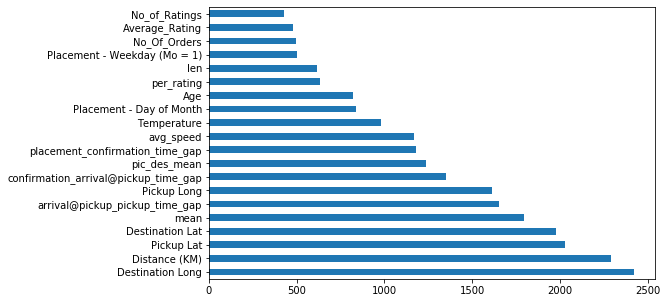

In [296]:
feature_imp = pd.Series(mlgb.feature_importance(), index=xtr.columns)
feature_imp.nlargest(20).plot(kind='barh', figsize=(8,5))

In [297]:
yts_lgb = mlgb.predict(xts, num_iteration = mlgb.best_iteration)
sub = test[['Order No']]
sub['Time from Pickup to Arrival'] = np.round(yts_lgb).astype(int)
sub.head()

,Order No,Time from Pickup to Arrival
21201,Order_No_19248,1602
21202,Order_No_12736,1741
21203,Order_No_768,1260
21204,Order_No_15332,1124
21205,Order_No_21373,1226


In [298]:
sub.to_csv('eta22.csv', index=False)

In [94]:
def bayes_parameter_opt_lgb(xtr, ytr, init_round=50, opt_round=50, n_folds=2, n_estimators=500000,output_process=False,
                           bagging_fraction = 1):
    train_data = lgb.Dataset(xtr, label = ytr)
    def lgb_crossval(num_leaves,max_depth,learning_rate,feature_fraction,reg_alpha,reg_lambda,min_child_samples):
        params = { "objective":'rmse',
             "num_leaves": int(num_leaves),
             "learning_rate": learning_rate,
             "num_iterations": n_estimators,
             "metric": 'rmse',
             "bagging_fraction" : bagging_fraction,
             "feature_fraction" : max(min(feature_fraction,1), 0),
             "reg_alpha" : max(reg_alpha,0),
             "reg_lambda" : max(reg_lambda,0),
             "random_state" : 0,
             "verbosity" : -1,
             "max_depth": int(max_depth),
             "min_child_samples": int(min_child_samples),
             "early_stopping_round": 1000,
             "save_binary": True}
        cv_result = lgb.cv(params, train_data, nfold = n_folds, stratified = False, verbose_eval = 500000, 
                           metrics = ['rmse'])
        return max(-1*(np.array(cv_result['rmse-mean'])))
    lgb_opt = BayesianOptimization(lgb_crossval,{"num_leaves":(5,120),
                                            "max_depth":(4,25),
                                            "learning_rate":(0.03,0.9),
                                            "feature_fraction":(0.1,1),
                                            "reg_alpha":(1,7.5),
                                            "reg_lambda":(1,7.5),
                                            "min_child_samples":(5,200)},
                                            random_state = 0)
    lgb_opt.maximize(init_points = init_round, n_iter = opt_round)
    return lgb_opt.max
opt_params = bayes_parameter_opt_lgb(xtr, ytr, init_round=50, opt_round=50, n_folds=2, n_estimators=500000)

|   iter    |  target   | learni... | max_depth | min_ch... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------
|  1        | -737.7    |  0.503    |  19.02    |  122.5    |  67.66    |  3.754    |  5.198    |
|  2        | -732.1    |  0.4051   |  22.73    |  192.9    |  49.1     |  6.146    |  4.438    |
|  3        | -731.4    |  0.5199   |  23.44    |  18.85    |  15.02    |  1.131    |  6.412    |
|  4        | -743.7    |  0.7048   |  22.27    |  195.8    |  96.9     |  4.0      |  6.073    |
|  5        | -731.1    |  0.1241   |  17.44    |  32.95    |  113.6    |  4.392    |  3.695    |
|  6        | -730.8    |  0.2528   |  20.26    |  93.95    |  70.37    |  1.122    |  5.015    |
|  7        | -735.7    |  0.5586   |  16.96    |  189.0    |  83.41    |  3.337    |  3.841    |
|  8        | -735.6    |  0.6339   |  5.265    |  135.0    |  82.12    |  2.367    |  1.838    |
|  9        | -728.8

|  50       | -741.8    |  0.47     |  8.711    |  24.08    |  104.2    |  7.324    |  7.245    |
|  51       | -723.3    |  0.1931   |  9.675    |  171.8    |  88.5     |  1.169    |  4.838    |
|  52       | -737.5    |  0.5857   |  11.7     |  140.8    |  90.04    |  5.259    |  2.705    |
|  53       | -733.7    |  0.4036   |  18.21    |  114.7    |  69.96    |  1.819    |  3.326    |
|  54       | -726.0    |  0.2709   |  6.627    |  118.1    |  21.7     |  5.115    |  5.429    |
|  55       | -720.8    |  0.1407   |  9.385    |  107.2    |  15.63    |  4.892    |  6.637    |
|  56       | -734.5    |  0.4188   |  20.11    |  92.99    |  70.51    |  1.175    |  5.122    |
|  57       | -738.7    |  0.5476   |  11.86    |  119.9    |  100.3    |  5.178    |  5.734    |
|  58       | -744.9    |  0.4485   |  22.45    |  37.34    |  75.5     |  1.658    |  6.747    |
|  59       | -726.7    |  0.294    |  20.32    |  187.2    |  95.76    |  5.46     |  3.455    |
|  60       | -743.7

In [95]:
opt_params

{'target': -719.7055515577092,
 'params': {'learning_rate': 0.06592339590791654,
  'max_depth': 7.952780748808626,
  'min_child_samples': 133.83561505350104,
  'num_leaves': 20.126281613577298,
  'reg_alpha': 2.2108810079955443,
  'reg_lambda': 3.9392911500264294}}

In [96]:
param = {"feature_fraction" : 1,
         "learning_rate":  0.06592339590791654,
         "max_depth": 7,
         "min_child_samples": 133,
         "num_leaves":20,
         "reg_alpha" : 2.2108810079955443,
         "reg_lambda" : 3.9392911500264294,
         "objective":'rmse', 
         "metric": 'rmse',
        "bagging_fraction" : 1,
        "random_state" : 0,
        "bagging_seed" : 300,
        "verbosity" : -1
        }
mlgb_bayes = lgb.train(param, train_data, 500000, valid_sets = [valid_data,train_data], early_stopping_rounds = 500, verbose_eval=200)

Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 649.885	valid_0's rmse: 712.76
[400]	training's rmse: 609.704	valid_0's rmse: 714.388
[600]	training's rmse: 580.339	valid_0's rmse: 717.99
Early stopping, best iteration is:
[270]	training's rmse: 634.147	valid_0's rmse: 712.321


In [97]:
yts_lgb = mlgb_bayes.predict(xts, num_iteration = mlgb_bayes.best_iteration)
sub = test[['Order No']]
sub['Time from Pickup to Arrival'] = np.round(yts_lgb).astype(int)
sub.head()

,Order No,Time from Pickup to Arrival
21201,Order_No_19248,1543
21202,Order_No_12736,1851
21203,Order_No_768,1204
21204,Order_No_15332,1051
21205,Order_No_21373,1247
